In [1]:
MAKE_BOOK_FIGURES=Trueimport numpy as npimport scipy.stats as stimport matplotlib as mplimport matplotlib.pyplot as plt%matplotlib inlineimport matplotlib_inlinematplotlib_inline.backend_inline.set_matplotlib_formats('svg')import seaborn as snssns.set_context("paper")sns.set_style("ticks")def set_book_style():    plt.style.use('seaborn-v0_8-white')     sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings        'font.family': 'serif',  # For academic publishing        'font.size': 8,  # As requested, 10pt font        'axes.labelsize': 8,        'axes.titlesize': 8,        'xtick.labelsize': 7,  # Slightly smaller for better readability        'ytick.labelsize': 7,        'legend.fontsize': 7,                # Line and marker settings for consistency        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout to prevent clipped labels        'figure.constrained_layout.use': True,                # Default DPI (will override when saving)        'figure.dpi': 600,        'savefig.dpi': 600,                # Despine - remove top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional trim settings        'figure.autolayout': True,  # Alternative to constrained_layout        'savefig.bbox': 'tight',    # Trim when saving        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off    })def set_notebook_style():    plt.style.use('seaborn-v0_8-white')    sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings - using default sizes        'font.family': 'serif',        'axes.labelsize': 10,        'axes.titlesize': 10,        'xtick.labelsize': 9,        'ytick.labelsize': 9,        'legend.fontsize': 9,                # Line and marker settings        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout settings        'figure.constrained_layout.use': True,                # Remove only top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional settings        'figure.autolayout': True,        'savefig.bbox': 'tight',        'savefig.pad_inches': 0.1    })def save_for_book(fig, filename, is_vector=True, **kwargs):    """    Save a figure with book-optimized settings.        Parameters:    -----------    fig : matplotlib figure        The figure to save    filename : str        Filename without extension    is_vector : bool        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.    **kwargs : dict        Additional kwargs to pass to savefig    """        # Set appropriate DPI and format based on figure type    if is_vector:        dpi = 1000        ext = '.pdf'    else:        dpi = 600        ext = '.tif'        # Save the figure with book settings    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)def make_full_width_fig():    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)def make_half_width_fig():    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)if MAKE_BOOK_FIGURES:    set_book_style()else:    set_notebook_style()make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

# Linear regression with a single variable

We will now look at a simple linear regression example with a single variable.

## An example where things work as expected

Let's create a synthetic dataset to introduce the basic concepts.
It must be synthetic because we want to know the ground truth.
Let's start with pairs of $x$ and $y$, which have a linear relationship. We contaminate $y$ with Gaussian noise.
In particular, we generate the data from:

$$
y_i = -0.5 + 2 x_i + 0.1\epsilon_i,
$$

where $\epsilon_i \sim N(0,1)$ and where we sample $x_i \sim U([0,1])$.
Here is how to generate this synthetic dataset and what it looks like:

In [2]:
np.random.seed(12345)

num_obs = 10
x = np.random.rand(num_obs)
w0_true = -0.5
w1_true = 2.0
sigma_true = 0.1
y = (
    w0_true
    + w1_true * x
    + sigma_true * np.random.randn(num_obs)
)

Let's plot the data:

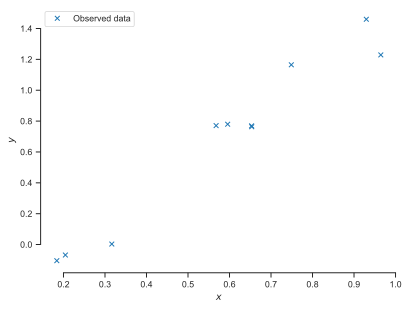

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y, 'x', label='Observed data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best', frameon=True)
sns.despine(trim=True);

We will now use least squares to fit the data to this linear model:

$$
y = w_0 + w_1 x.
$$

Least squares minimize the square loss:

$$
L(\mathbf{w}) = \sum_{i=1}^n(y_i - w_0 - w_1 x_i)^2 = \parallel \mathbf{y} - \mathbf{X}\mathbf{w}\parallel^2,
$$

where $\mathbf{y} = (y_1,\dots,y_n)$ is the vector of observations, $\mathbf{w} = (w_0, w_1)$ is the weight vector, and the $n\times 2$ *design matrix* $\mathbf{X}$ is:

$$
\mathbf{X} = 
\begin{bmatrix} 
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}.
$$

We need to make the design matrix $\mathbf{X}$:

In [4]:
# Put together a column of ones next to the observed x's
X = np.hstack(
    [np.ones((num_obs, 1)), x.reshape((num_obs, 1))]
)
X

array([[1.        , 0.92961609],
       [1.        , 0.31637555],
       [1.        , 0.18391881],
       [1.        , 0.20456028],
       [1.        , 0.56772503],
       [1.        , 0.5955447 ],
       [1.        , 0.96451452],
       [1.        , 0.6531771 ],
       [1.        , 0.74890664],
       [1.        , 0.65356987]])

Once we have this, we can use [numpy.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html?highlight=lstsq#numpy.linalg.lstsq) to solve the least squares problem. 
This function solves the linear system we derived in the previous section, i.e.,

$$
\mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{y}.
$$

It works as follows:

In [5]:
w, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
print(f'w_0 = {w[0]:1.2f}')
print(f'w_1 = {w[1]:1.2f}')

w_0 = -0.48
w_1 = 1.99


So, the values we found for $w_0$ and $w_1$ are close to the correct values.
The agreement is not perfect.
There is noise in the data, and we have only used ten observations.
The more noise there is, the more observations it would take to identify the regression coefficients correctly.

Let's now plot the regression function against the data:

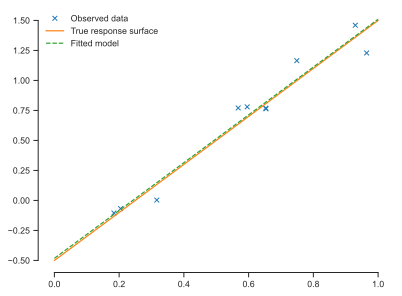

In [6]:
# Make predictions
# Some points on which to evaluate the regression function
xx = np.linspace(0, 1, 100)
# The true connection between x and y
yy_true = w0_true + w1_true * xx
# The model we just fitted
yy = w[0] + w[1] * xx

# Plot them
fig, ax = plt.subplots()
# plot the data again
ax.plot(x, y, 'x', label='Observed data')
# overlay the true 
ax.plot(xx, yy_true, label='True response surface')
# overlay our prediction
ax.plot(xx, yy, '--', label='Fitted model')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

## Questions

+ Try increasing ``num_obs`` to 100. Does the fit improve? Conclusion: When training with least squares, more data is better.
+ Try decreasing ``num_obs`` to 2. What is happening here? This is an example of fitting the noise.

## An example where things do not work as expected: underfitting

Let's try to fit a linear regression model to data generated from:

$$
y_i = -0.5 + 2x_i + 2x_i^2 + \epsilon_i,
$$

where $\epsilon_i \sim N(0, 1)$ and where we sample $x_i \sim U([-1,1])$:

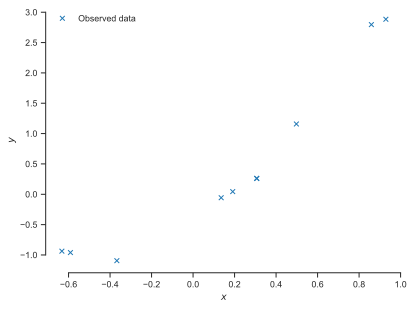

In [7]:
np.random.seed(12345)

num_obs = 10
x = -1.0 + 2 * np.random.rand(num_obs)
w0_true = -0.5
w1_true = 2.0
w2_true = 2.0
sigma_true = 0.1
y = (
    w0_true
    + w1_true * x
    + w2_true * x ** 2
    + sigma_true * np.random.randn(num_obs)
)

fig, ax = plt.subplots()
ax.plot(x, y, 'x', label='Observed data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

We will still fit a linear model to this dataset. We know it will not work well, but let's try it anyway.
First, create the design matrix just like before:

In [8]:
X = np.hstack(
    [np.ones((num_obs, 1)), x.reshape((num_obs, 1))]
)

w, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

print(f'w_0 = {w[0]:1.2f}')
print(f'w_1 = {w[1]:1.2f}')

w_0 = 0.03
w_1 = 2.46


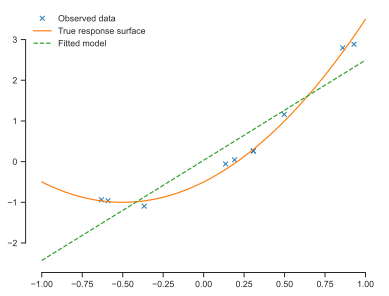

In [9]:
# Make predictions
xx = np.linspace(-1, 1, 100)
yy_true = w0_true + w1_true * xx + w2_true * xx ** 2
yy = w[0] + w[1] * xx

# Plot them
fig, ax = plt.subplots()
ax.plot(x, y, 'x', label='Observed data')
ax.plot(xx, yy_true, label='True response surface')
ax.plot(xx, yy, '--', label='Fitted model')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

## Questions

+ Experiment with very small ``num_obs``. If you did not know the true response surface, can you say whether or not the fit is good?

+ Experiment with a big ``num_obs``. Does the fit improve? This is an example of *underfitting*. Your model does not have enough expressivity to capture the data.